In [17]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
from models.loader import model_loader
from data.loaders import dataset_loader
from configs.defaults import Globs, _rule_based_4_configs, rossmann_config, variance_data_configs
from helpers.gpu_selection import use_gpu
use_gpu(False)
matplotlib.rcParams.update({'font.size': 12})

In [18]:
def plot_samples(config, X, y, features, save=False, random_state=0):
    class_idxs={}
    for i in np.unique(y):
        class_idxs[i] = np.where(y == i)[0]
    
    for k in class_idxs:
        random.seed(random_state)
        sample_idx = random.choice(class_idxs[k])
        plt.plot(dataset['train_x'][sample_idx])
        # plt.title(f'Class: {features[int(k)]}') # , Idx: {sample_idx}')
        if config['DATASET'] == 'rossmann':
            plt.xticks(range(config['HISTORY_SIZE']), range(-config['HISTORY_SIZE'], 0) )
            plt.xlabel('Timesteps (Days)')
            plt.ylabel('Sales')
        if save:
            save_path = f'reports/figures/samples/{config["DATASET"]}_class{int(k)}_idx_{sample_idx}.png'
            plt.subplots_adjust(left=0.2)
            plt.savefig(save_path, dpi=400)
        plt.show()

In [3]:
config = dict({'NUM_ROUND':0, 'DATASET':'rossmann'}, **rossmann_config)
dataset_params, dataset = dataset_loader['rossmann'](config)

/home/ozan/.conda/envs/unilever/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Packing dataset


In [18]:
print(len(dataset['train_x']), len(dataset['test_x']))

35359 15875


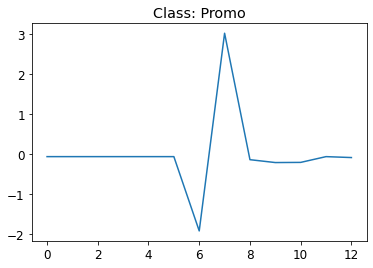

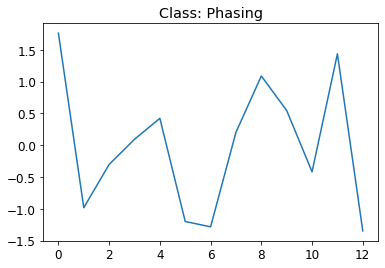

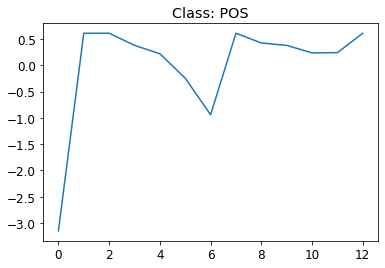

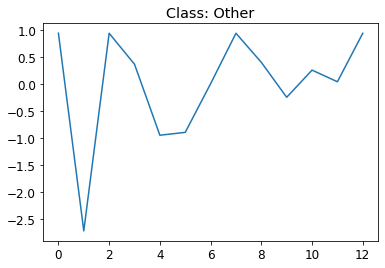

In [40]:
plot_samples(config, dataset['test_x'], dataset['test_y'], dataset_params['LABELS'],
    save=False, random_state=0)

In [4]:
config = dict({'NUM_ROUND':0, 'DATASET':'rossmann'}, **rossmann_config)
dataset_params, dataset = dataset_loader['rossmann'](config)

/home/ozan/.conda/envs/unilever/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Packing dataset


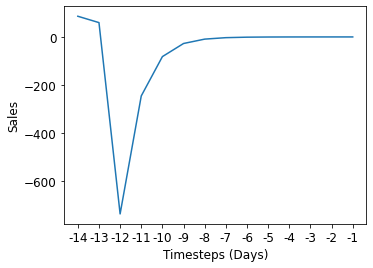

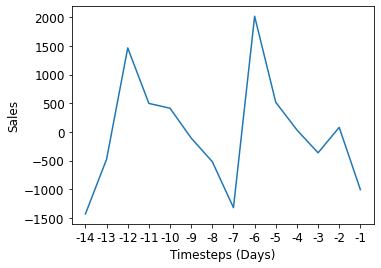

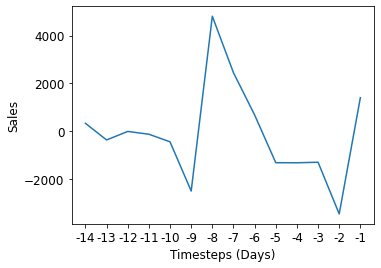

In [19]:
plot_samples(config, dataset['train_x'], dataset['train_y'], ['Low', 'Mid', 'High'],
    save=True, random_state=8)